In [3]:
sys.path.append('c:/Users/cschiff/Documents/GitHub/PAD/')
import Grapher
import Plasma_Plotter
import matplotlib.cm as cm

In [2]:
fpiprd1  = 'x:'
filename =  '/data/ftp/mms2/fpi/brst/l2/des-debug/2016/08/10/mms2_fpi_brst_l2_des-debug_20160810090424_v3.1.1.cdf'
FTL      = pycdf.CDF(fpiprd1+filename)

In [ ]:
obs = 'MMS2'

In [101]:
e_t   = np.asarray(FTL['Epoch'])
e_n   = np.asarray(FTL['mms2_des_numberdensity_brst'])
e_V   = np.asarray(FTL['mms2_des_bulkv_dbcs_brst'])
e_err = np.asarray(FTL['mms2_des_errorflags_brst'])
des_q = ["{0:b}".format(int(e_err[i])).zfill(16) for i in range(len(e_err))]
err_array = np.zeros((len(e_err),17))
for N in range(len(e_err)):
    err_array[N,1:17] = np.array([des_q[N][i] for i in range(16)])

In [119]:
err_labels = ['0 - no error   ','1 - man. flagged ','2 - saturation',\
              '3 - pot > 20V  ','4 - >25% cold    ','5 - >25% hot  ',\
              '6 - v/vth > 2.5','7 - n_e < 0.05/cc','8 - bentPipe B',\
              '9 - survey B   ','10 - no n_photo  ','11 - comp. err',\
              '','','','','']
colors = cm.rainbow(np.linspace(0, 1, 17))

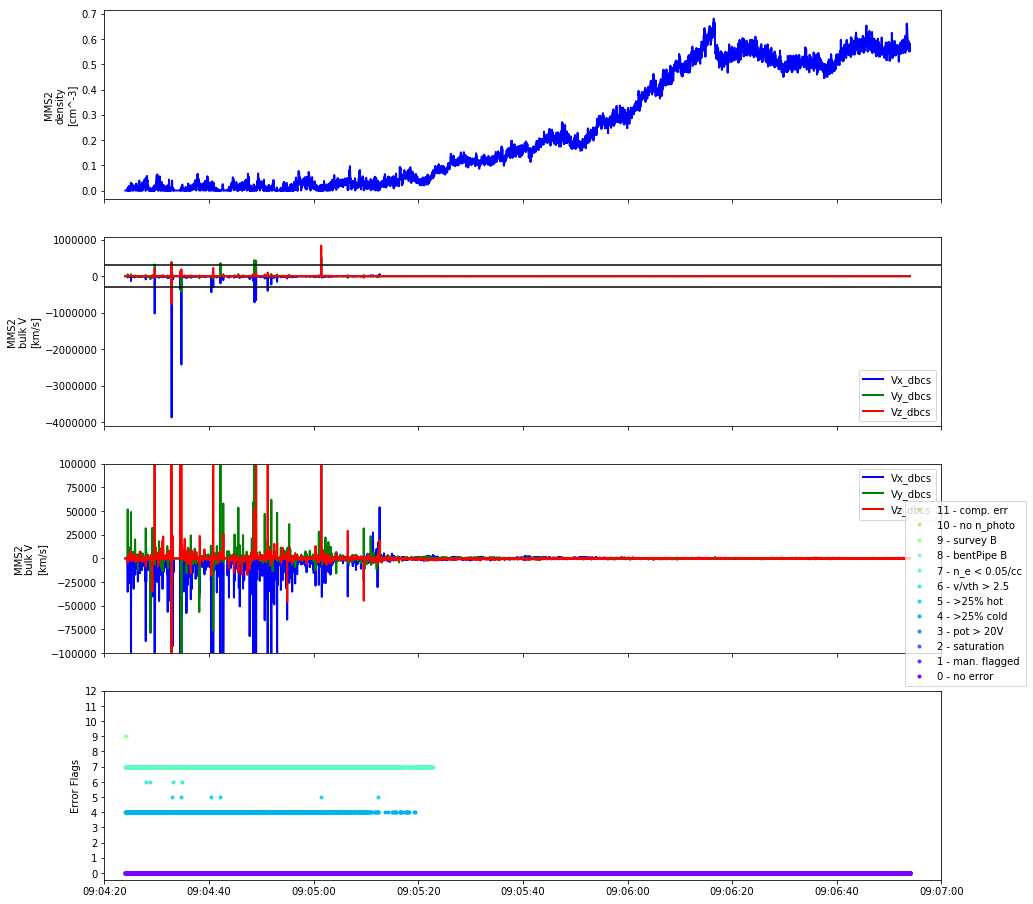

In [137]:
N   = 4
fig,axs = plt.subplots(nrows=N,ncols=1,figsize=(15,N*4),sharex=True)
t1 = Grapher.traces(axs[0],e_t,e_n)
t1.format_ax_time(e_t,'brst')
axs[0].set_ylabel('MMS2\ndensity\n[cm^-3]')
t2 = Grapher.traces(axs[1],e_t,e_V[:,0])
t2.add_line(e_t,e_V[:,1])
t2.add_line(e_t,e_V[:,2])
t2.customize_line(0,{'color':'b','label':'Vx_dbcs'})
t2.customize_line(1,{'color':'g','label':'Vy_dbcs'})
t2.customize_line(2,{'color':'r','label':'Vz_dbcs'})
axs[1].set_ylabel('MMS2\nbulk V\n[km/s]')
axs[1].legend(loc='best')
axs[1].axhline(y=3e5,color='k')
axs[1].axhline(y=-3e5,color='k')
t3 = Grapher.traces(axs[2],e_t,e_V[:,0])
t3.add_line(e_t,e_V[:,1])
t3.add_line(e_t,e_V[:,2])
t3.customize_line(0,{'color':'b','label':'Vx_dbcs'})
t3.customize_line(1,{'color':'g','label':'Vy_dbcs'})
t3.customize_line(2,{'color':'r','label':'Vz_dbcs'})
axs[2].set_ylabel('MMS2\nbulk V\n[km/s]')
axs[2].legend(loc='best')
axs[2].set_ylim([-1e5,1e5])
for i in reversed(range(17)):
    axs[3].plot(e_t,i*err_array[:,16-i],linestyle='none',marker = '.',color=colors[i],label=err_labels[i])
axs[3].set_yticks((0,1,2,3,4,5,6,7,8,9,10,11,12))
axs[3].legend(bbox_to_anchor=[0.95,1])
axs[3].set_ylabel('Error Flags')

In [130]:
fig.savefig('x:/fpishare/Conrad/Tagup/FTL.png')

In [34]:
FTL['mms2_des_errorflags_brst'].attrs

<zAttrList:
CATDESC: MMS2 FPI/DES vector of data-quality indicators at burst-start time [CDF_CHAR]
DEPEND_0: Epoch [CDF_CHAR]
DISPLAY_TYPE: time_series [CDF_CHAR]
FIELDNAM: MMS2 FPI/DES dataQuality errorFlags [CDF_CHAR]
FILLVAL: 4294967295 [CDF_UINT4]
FORMAT: I10 [CDF_CHAR]
LABLAXIS: errFlags [CDF_CHAR]
SCALETYP: linear [CDF_CHAR]
SI_CONVERSION:  >  [CDF_CHAR]
UNITS: 32-bit error flags [CDF_CHAR]
VALIDMAX: 4294967294 [CDF_UINT4]
VALIDMIN: 0 [CDF_UINT4]
VAR_NOTES: Value of zero signifies no quality errors. For non-zero values: Bit-0 = manually flagged interval, Bit-1 = overcounting/saturation effects likely present in skymap, Bit-2 = reported spacecraft potential above 20V, Bit-3 = invalid/unavailable spacecraft potential, Bit-4 = significant (>25%) cold plasma (<10eV) component, Bit-5 = significant (>25%) hot plasma (>30keV) component, Bit-6 = high sonic Mach number (v/vth > 2.5), Bit-7 = low calculated density (n_DES < 0.05 cm^-3), Bit-8 = bentPipe magnetic field used instead of brst 

In [121]:
len(colors)

17

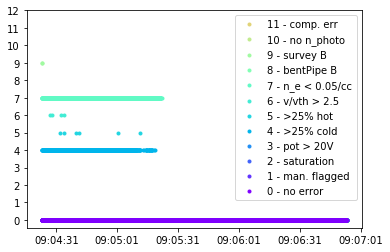

In [125]:
fiq = plt.figure()
axq = fiq.add_subplot(1,1,1)
for i in reversed(range(17)):
    axq.plot(e_t,i*err_array[:,16-i],linestyle='none',marker = '.',color=colors[i],label=err_labels[i])
axq.set_yticks((0,1,2,3,4,5,6,7,8,9,10,11,12))
axq.legend(loc='best')

In [124]:
reversed(range(17))

In [90]:
help(axq.set_xticks)

Help on method set_xticks in module matplotlib.axes._base:

set_xticks(self, ticks, minor=False) method of matplotlib.axes._subplots.AxesSubplot instance
    Set the x ticks with list of *ticks*
    
    ACCEPTS: sequence of floats



In [103]:
err_array.shape

(5000L, 17L)